# Bishop Chapter 2

In [1]:
include("../src/prml/distributions/distributions.jl")

using Plots
using .distributions


## Bernoulli Distribution

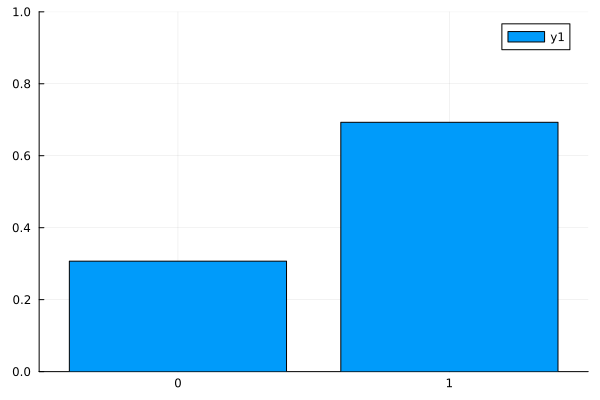

In [38]:
dist = Bernoulli{Float64}(0.7)

N = 1000
X = map(x -> sample(dist), 1:N)
p_zero = count(x -> x==0, X)/length(X)
p_one = count(x -> x==1, X)/length(X)
bar([0, 1], [p_zero, p_one], ylim=(0, 1), xticks=[0,1])

## Binomial Distribution

0.66